<a href="https://colab.research.google.com/github/umar-ali-k/NLP/blob/master/Learning_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

# Check the version of tensorflow

In [0]:
print(tf.__version__)

1.15.0-rc3


# We want tensorflow 2.0 version

In [0]:
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 35.2MB/s 
     |████████████████████████████████| 501kB 40.6MB/s 
     |████████████████████████████████| 3.1MB 29.6MB/s 
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3


# Now again check if Tensorflow 2.0 is installed

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Import all the necessary packages

In [0]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Class Embedding
Turns positive integers (indexes) into dense vectors of fixed size.

Inherits From: Layer 

In [0]:
embedding_layer = layers.Embedding(1000, 5)

In [0]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy()

array([[-0.02210465, -0.01979955,  0.04540262, -0.00227173,  0.04577086],
       [-0.03578021, -0.01887206, -0.01464223,  0.03593187, -0.01033501],
       [ 0.02642046,  0.0442769 ,  0.01535231, -0.01890593,  0.03679705]],
      dtype=float32)

# Learning embeddings from scratch

In [0]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder
tokenizer.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

**Movie reviews can be different lengths. We will use the padded_batch method to standardize the lengths of the reviews.**

In [0]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)


**As imported, the text of reviews is integer-encoded (each integer represents a specific word or word-part in the vocabulary).

Note the trailing zeros, because the batch is padded to the longest example.**

In [0]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[  62,    9,   45, ...,    0,    0,    0],
       [  12,  838, 7968, ...,    0,    0,    0],
       [6000,  105, 3480, ...,    0,    0,    0],
       ...,
       [  12,  258,  236, ...,    0,    0,    0],
       [  12,  689,  291, ...,  873, 1322, 7975],
       [  62,   27,    9, ...,    0,    0,    0]])

# Create a simple model
We will use the Keras Sequential API to define our model

In [0]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(tokenizer.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


# Compile and train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2500/2500 [==============================] - 105s 42ms/step - loss: 0.6300 - accuracy: 0.6997 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.4543 - accuracy: 0.8417 - val_loss: 0.4096 - val_accuracy: 0.8500
Epoch 3/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.3541 - accuracy: 0.8810 - val_loss: 0.3431 - val_accuracy: 0.8800
Epoch 4/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.3002 - accuracy: 0.8970 - val_loss: 0.3036 - val_accuracy: 0.9000
Epoch 5/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.2656 - accuracy: 0.9080 - val_loss: 0.2770 - val_accuracy: 0.9050
Epoch 6/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.2402 - accuracy: 0.9175 - val_loss: 0.2579 - val_accuracy: 0.9100
Epoch 7/10
2500/2500 [==============================] - 19s 7ms/step - loss: 0.2202 - accuracy: 0.9236 - val_loss: 0.2444 - val_acc

# Plot the Model

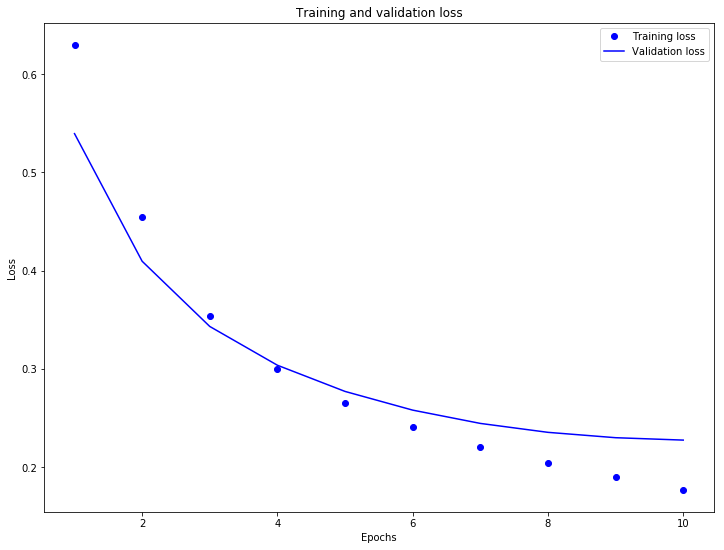

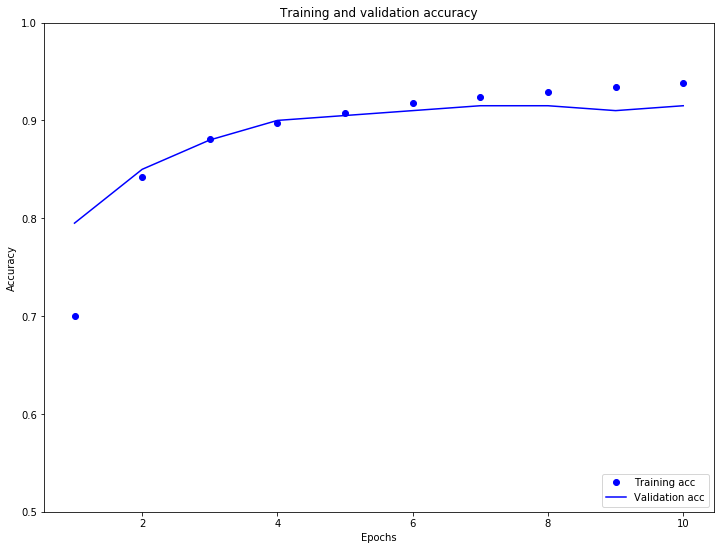

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

# Retrieve the learned embeddings
**Next, let's retrieve the word embeddings learned during training. This will be a matrix of shape (vocab_size, embedding-dimension).**

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


**To use the Embedding Projector, we will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).**

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')